In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("wine_fraud.csv")

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [17]:
df['type'].unique()

array(['red', 'white'], dtype=object)

### DATA VISUALIZATION

<AxesSubplot:xlabel='quality', ylabel='count'>

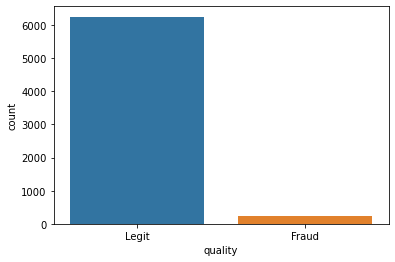

In [18]:
sns.countplot(data=df, x = 'quality')

<AxesSubplot:xlabel='type', ylabel='count'>

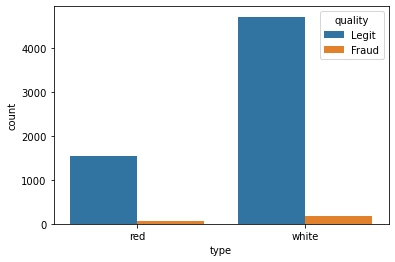

In [19]:
sns.countplot(data=df, x = 'type', hue = 'quality')

In [20]:
total_red = len(df[df['type']=='red'])
total_white= len(df[df['type']=='white'])
fraud_red = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')])
fraud_white = len(df[(df['type']=='white') & (df['quality']=='Fraud')])

In [21]:
percent_fraud_red = (fraud_red/total_red)*100
percent_fraud_red

3.9399624765478425

In [22]:
percent_fraud_white = (fraud_white/total_white)*100
percent_fraud_white 

3.7362188648427925

In [23]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [24]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

In [25]:
corr = pd.DataFrame(index = df.corr()['Fraud'].keys(), data = df.corr()['Fraud'])
corr

,Fraud
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


In [26]:
corr = corr.drop(['target', 'Fraud'], axis = 0)
corr

KeyError: "['target'] not found in axis"

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'Fraud')]

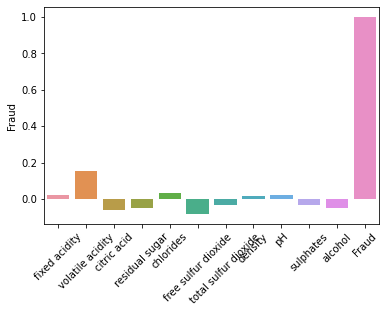

In [27]:
chart = sns.barplot(x=corr.index, y=corr['Fraud'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

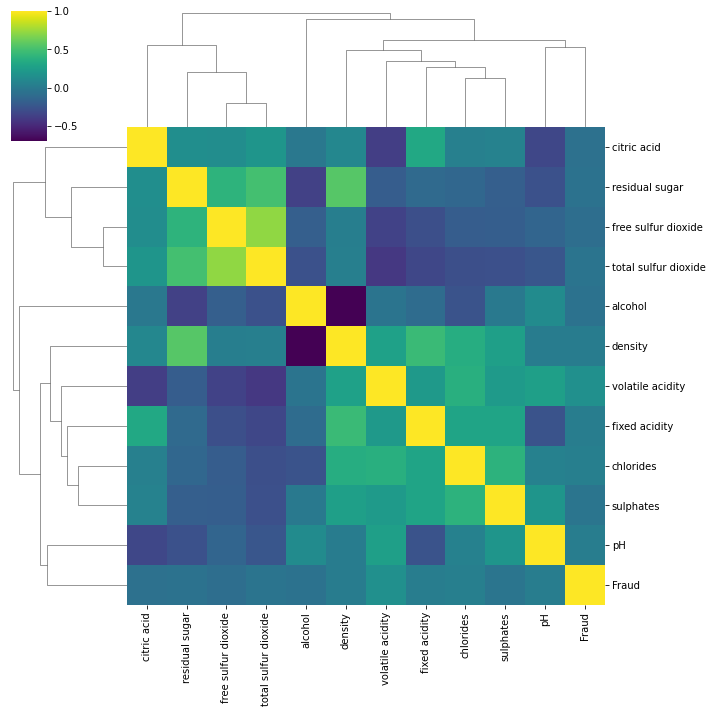

In [28]:
sns.clustermap(df.corr(),cmap='viridis')

In [29]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [30]:
df = df.drop('Fraud', axis = 1)

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [32]:
X = df.drop('quality',axis=1)
y = df['quality']

### MACHINE LEARNING MODEL

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(class_weight='balanced')

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [42]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [44]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

### PERFORMANCE EVALUATION

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
grid_pred = grid.predict(scaled_X_test)

In [47]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [48]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

